# Investigating Airport Accidents

Accidents are an unfortunate incident when it comes to air traveling. Although flying is statistically safer than driving, accidents--whether minor or significant--occur daily.

The pipeline character separates the data points and prevents meaningful analysis. So, the first step is to clean the data and structure it in a format that is easier to read and do an exploratory analysis. The last step is to do some comparative study:
- Measure accidents by state
- Measuring fatalities and injuries by month
- Measure accidents by air carriers 

In [1]:
#Load libraries 

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
aviation_data = list(open("data-sets/AviationData.txt", 'r'))
aviation_data

['Event Id | Investigation Type | Accident Number | Event Date | Location | Country | Latitude | Longitude | Airport Code | Airport Name | Injury Severity | Aircraft Damage | Aircraft Category | Registration Number | Make | Model | Amateur Built | Number of Engines | Engine Type | FAR Description | Schedule | Purpose of Flight | Air Carrier | Total Fatal Injuries | Total Serious Injuries | Total Minor Injuries | Total Uninjured | Weather Condition | Broad Phase of Flight | Report Status | Publication Date | \n',
 '20150908X74637 | Accident | CEN15LA402 | 09/08/2015 | Freeport, IL | United States | 42.246111 | -89.581945 | KFEP | albertus Airport | Non-Fatal | Substantial | Unknown | N24TL | CLARKE REGINALD W | DRAGONFLY MK |  |  |  | Part 91: General Aviation |  | Personal |  |  | 1 |  |  | VMC | TAKEOFF | Preliminary | 09/09/2015 | \n',
 '20150906X32704 | Accident | ERA15LA339 | 09/05/2015 | Laconia, NH | United States | 43.606389 | -71.452778 | LCI | Laconia Municipal Airport | Fatal

In [46]:
#remove pipeline character
aviation_list = [data.split(" | ") for data in aviation_data]

def linear_search(data):
    '''function takes in one argument and returns a specific row'''
    return [row.append(row) or row for row in aviation_list if data in row] 
aviation_search = linear_search("LAX94LA336")
print(aviation_search)

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '\n', [...]]]


The above process takes exponential time since it has to loop through each row and column. Also, the difficulty in manipulating data in the list cannot be understated.

In [49]:
#grab header
header = aviation_data[0].split(" | ")
#loop through aviation_data and return a dictionary
aviation_dict_list = [dict(zip(header,data.split(" | "))) for data in aviation_data[1:]]
def hash_search(data):
    '''function takes in one argument and returns a specific key-value pair'''
    return [row for row in aviation_dict_list if data in row.values()]
aviation_search = hash_search("LAX94LA336")
aviation_search

[{'\n': '\n',
  'Accident Number': 'LAX94LA336',
  'Air Carrier': '',
  'Aircraft Category': '',
  'Aircraft Damage': 'Destroyed',
  'Airport Code': '',
  'Airport Name': '',
  'Amateur Built': 'No',
  'Broad Phase of Flight': 'UNKNOWN',
  'Country': 'United States',
  'Engine Type': 'Reciprocating',
  'Event Date': '07/19/1962',
  'Event Id': '20001218X45447',
  'FAR Description': '',
  'Injury Severity': 'Fatal(4)',
  'Investigation Type': 'Accident',
  'Latitude': '',
  'Location': 'BRIDGEPORT, CA',
  'Longitude': '',
  'Make': 'PIPER',
  'Model': 'PA24-180',
  'Number of Engines': '1',
  'Publication Date': '09/19/1996',
  'Purpose of Flight': 'Personal',
  'Registration Number': 'N5069P',
  'Report Status': 'Probable Cause',
  'Schedule': '',
  'Total Fatal Injuries': '4',
  'Total Minor Injuries': '0',
  'Total Serious Injuries': '0',
  'Total Uninjured': '0',
  'Weather Condition': 'UNK'}]

The above process places the headers in the correct place and makes it easier to analyze the data.

## Measuring Accidents by State

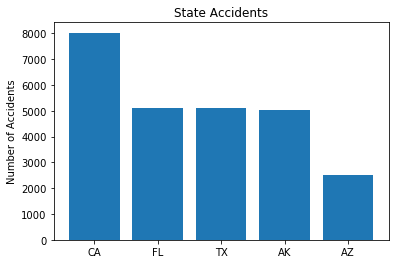

In [55]:
state_accidents = dict()
for row in aviation_dict_list:
    if row["Country"] == "United States" and ", " in row["Location"]:
        states = row["Location"].split(", ")[1]
        #return key value
        state_accidents[states] = state_accidents.get(states,0) + 1

#Grab the top 5 accidents that accured by state and plot them
top_5_state_accidents = dict(Counter(state_accidents).most_common(5))
label, value = zip(*top_5_state_accidents.items())
idx = np.arange(len(label))
plt.bar(idx,value)
plt.xticks(idx, label)
plt.ylabel("Number of Accidents")
plt.title("State Accidents")
plt.show()

The states with the highest total of accidents are California, Florida, Texas, Alaska, and Arizona. Since this dataset does not contain the number of successful flight hours, we cannot gauge a fair statistical comparison between states.

## Finding Fatalities and Injuries by Month

In [44]:
map_month = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December",
}
monthly_injuries = defaultdict(lambda: [0,0])
for row in aviation_dict_list:
    month = row['Event Date'].split("/")[0]
    if month != "":
        month = map_month[month]
    for idx, value in enumerate(["Total Fatal Injuries", "Total Serious Injuries"]):
        if row[value] != "":
            monthly_injuries[month][idx] += int(row[value])
        else:
            monthly_injuries[month][idx] += 0

dict(Counter(monthly_injuries).most_common(3))

{'August': [4855, 2069], 'July': [5001, 2002], 'September': [4027, 1502]}

## Findings

From left to write reads the following: month, total fatalities, and total injuries. The months with the most fatalities and injuries are July, August, and September. It is not surprising since these are summer months; months that people travel frequently. 

## Measuring Accidents by Air Carriers

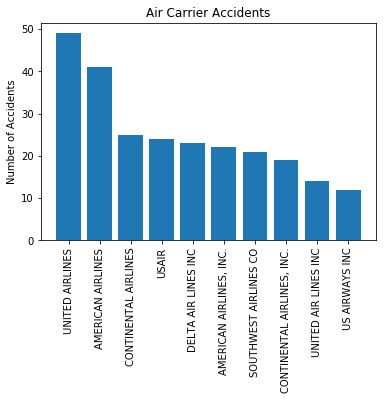

In [53]:
carrier_accidents = dict()
for row in aviation_dict_list:
    if row["Air Carrier"] != "":
        carrier = row["Air Carrier"][0:]
        #return key value
        carrier_accidents[carrier] = carrier_accidents.get(carrier,0) + 1

#Grab the top 10 carrier accidents and plot them
top_10_carrier_accidents = dict(Counter(carrier_accidents).most_common(10))
label, value = zip(*top_10_carrier_accidents.items())
idx = np.arange(len(label))
plt.bar(idx,value)
plt.xticks(idx, label, rotation=90)
plt.ylabel("Number of Accidents")
plt.title("Air Carrier Accidents")
plt.show()

United and American Airlines lead the way with the most accidents. United Air Lines Inc and US Airways have the fewest accidents in comparison. 

## Conclusion

More can analysis can be done with this data set. It would be interesting to see airline accidents on a map. A time series could be used to plot each point and see if the overall trend of accidents. 